In [2]:
import pandas as pd
from sklearn.datasets import load_iris
iris=load_iris()

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
df[df.target==-1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target


In [10]:
df[df.target==-2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target


In [11]:
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [12]:
df0=df[:50]
df1=df[50:100]
df2=df[100:]

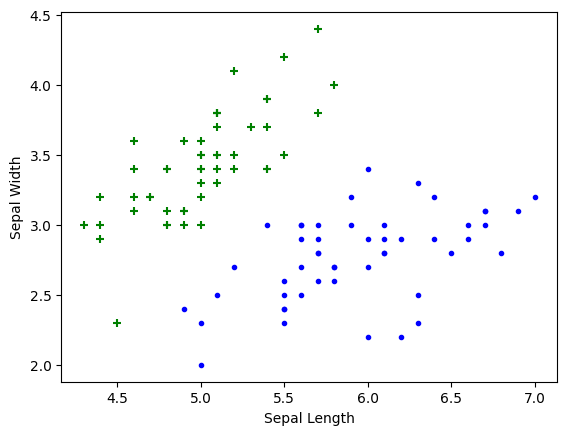

In [13]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'],color="green",marker='+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'],color="blue",marker='.')

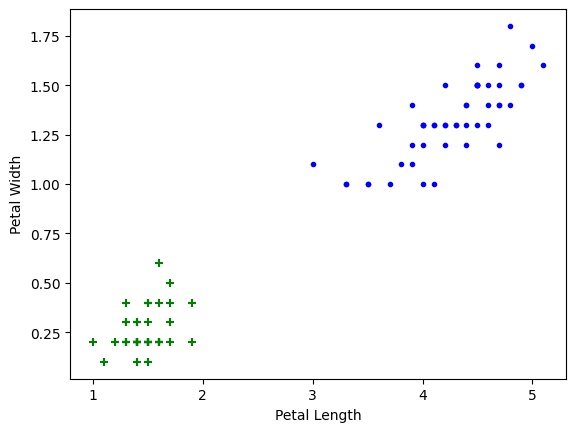

In [14]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='.')

- using SVM(Support Vector machine)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x=df.drop(['target','flower_name'],axis='columns')
y=df.target

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.9)

In [18]:
len( x_train)

135

In [19]:
len(x_test)

15

In [20]:
from sklearn.svm import SVC
model=SVC()

In [21]:
model.fit(x_train,y_train)

SVC()

In [22]:
model.score(x_test,y_test)

1.0

In [23]:
# model.predict([[2.0,3.0,5.0,5.7]])
model.predict([[3.0,4.0,23.9,8.7]])

array([2])

# Tune Parameters
    - Regularization(C)

In [24]:
model_C=SVC(C=1)
model_C.fit(x_train,y_train)
model_C.score(x_test,y_test)


1.0

In [25]:
model_C=SVC(C=10)
model_C.fit(x_train,y_train)
model_C.score(x_test,y_test)

1.0

- Gamma

In [26]:
model_g=SVC(gamma=10)
model_g.fit(x_train,y_train)
model_g.score(x_test,y_test)

1.0

- Kernel

In [27]:
model_k=SVC(kernel='linear')
model_k.fit(x_train,y_train)

SVC(kernel='linear')

In [28]:
model_k.score(x_test,y_test)

1.0

In [29]:
df=pd.read_csv('./Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [30]:
df1=df.copy()
df1=df1.drop('User ID',axis='columns')

In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
# df1['Gender'] = le.fit_transform(df1['Gender'])
df2=df1.apply(LabelEncoder().fit_transform)
df2

,Gender,Age,EstimatedSalary,Purchased
0,1,1,4,0
1,1,17,5,0
2,0,8,26,0
3,0,9,39,0
4,1,1,57,0
...,...,...,...,...
395,0,28,24,1
396,1,33,8,1
397,0,32,5,1
398,1,18,17,0


In [32]:
x=df1.iloc[:,[1,2]]
y=df1.iloc[:,0]
y.head()

0      Male
1      Male
2    Female
3    Female
4      Male
Name: Gender, dtype: object

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.9)

In [34]:
from sklearn.preprocessing import StandardScaler
x_train=StandardScaler().fit_transform(x_train)
x_test=StandardScaler().fit_transform(x_test)

In [40]:
model=SVC()
model.fit(x_train,y_train)

SVC()

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 362    Female
300    Female
43       Male
292      Male
273      Male
        ...  
203    Female
127      Male
96     Female
388      Male
147    Female
Name: Gender, Length: 360, dtype: object

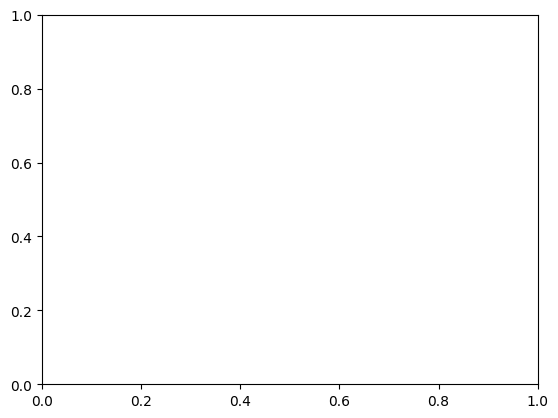

In [39]:
import matplotlib.pyplot as plt

plt.scatter(x_train[:,0],x_train[:,1],c=y_train)
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.title('Training Data')
plt.show()

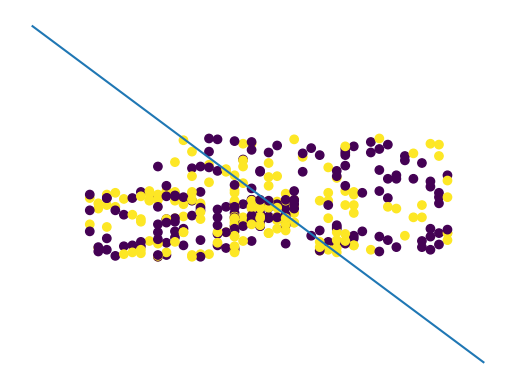

((-2.75, 2.75, -5.693012911494912, 6.640137632687078), None)

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(x_train, y_train)

#scatter plot
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)

#create hyperplane
w = model.coef_[0]
#print(w[0])
#print(w[1])
a = -w[0]/w[1]
xx = np.linspace(-2.5,2.5)
yy = a* xx - (model.intercept_[0] / w[1])

#plotting hyperplane
plt.plot(xx,yy)        
plt.axis("off"),plt.show()

-Entropy: meause of impurity or uncertainity
-Informationn Gain: decrease in entropy

In [44]:
df=pd.read_csv('./salaries.csv')
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [45]:
df=df.apply(LabelEncoder().fit_transform)
df

,company,job,degree,salary_more_then_100k
0,2,2,0,0
1,2,2,1,0
2,2,0,0,1
3,2,0,1,1
4,2,1,0,0
5,2,1,1,1
6,0,2,1,0
7,0,1,0,0
8,0,0,0,0
9,0,0,1,1


In [46]:
x=df.iloc[:,:3]
y=df.iloc[:,3]
x

,company,job,degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [47]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x,y)

DecisionTreeClassifier()

In [48]:
model.score(x,y)

1.0

In [52]:
model.predict([[2,2,1]])

array([0], dtype=int64)

In [54]:
model.predict([[2,0,1]])

array([1], dtype=int64)

-Underfit : HIgh Train test
-Overfit
-Optimum

In [55]:
from sklearn.datasets import load_digits
digits=load_digits()

In [56]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [57]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt

<Figure size 640x480 with 0 Axes>

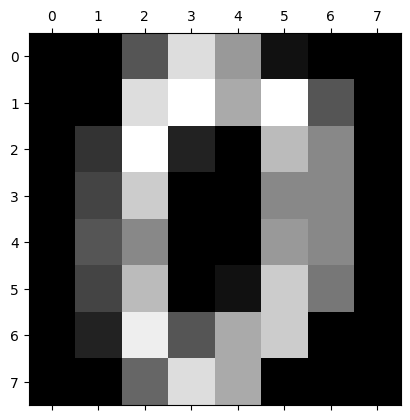

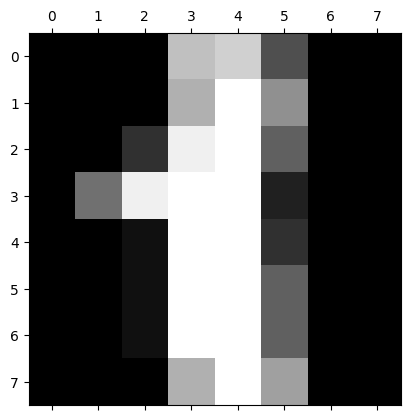

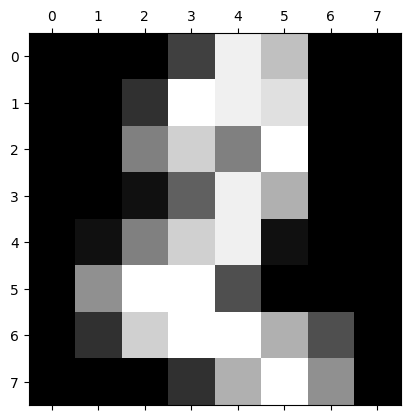

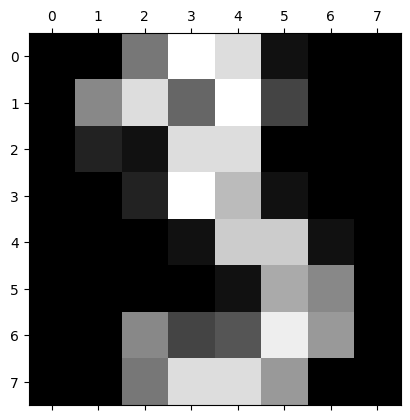

In [65]:
plt.gray() 
for i in range(4):
    plt.matshow(digits.images[i])

In [66]:
df=pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [67]:
df['target']=digits.target


In [69]:
x=df.drop('target',axis='columns')
y=df.target


In [103]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.2)

In [115]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10)

In [118]:
model.score(x_test,y_test)

0.8880389429763561

In [116]:
y_predicted=model.predict(x_test)

- Confusiuon Matrix

Text(95.72222222222221, 0.5, 'Truth')

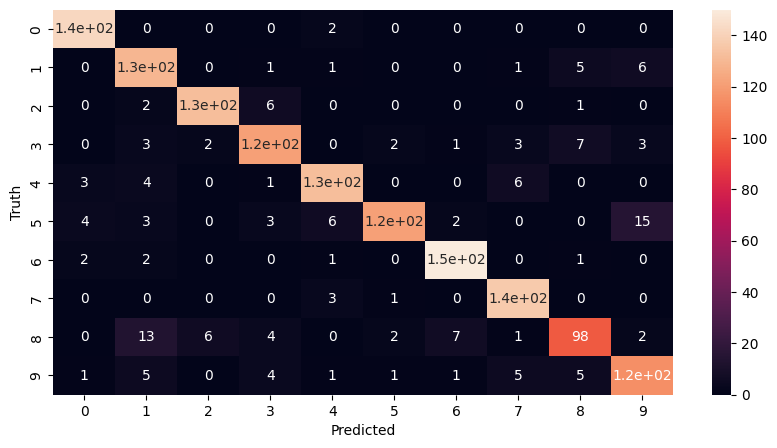

In [117]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [119]:
df=pd.read_csv('./Naive-Bayes-Classification-Data.csv')
df.head()

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1


In [123]:
x=df.iloc[:,:2]
y=df.iloc[:,2]


In [124]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [125]:
model.fit(x_train,y_train)

GaussianNB()

In [126]:
model.score(x_test,y_test)

0.8066759388038943

In [128]:
df=pd.read_csv('./salary(1).csv')
df.head()

,Job Title,Years of Experience,Salary
0,Software Engineer,5.0,90000
1,Data Analyst,3.0,65000
2,Senior Manager,15.0,150000
3,Sales Associate,7.0,60000
4,Director,20.0,200000


In [133]:
from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()
df2=df.apply(LabelEncoder().fit_transform)
df2.head()

,Job Title,Years of Experience,Salary
0,104,7,12
1,17,5,7
2,88,17,23
3,73,9,6
4,22,22,28


In [143]:
X=df2.iloc[:,1:2].values
y=df2.iloc[:,2].values
y

array([12,  7, 23,  6, 28,  5, 18, 10,  3, 16,  9, 22,  7, 20,  2, 19, 12,
       17,  1, 26, 10, 27,  4,  6, 22,  3, 16,  2, 22, 12, 30,  5,  9,  7,
       25,  3,  6, 17,  2, 24, 10, 27,  6,  3, 20,  2,  9, 26, 18,  1, 20,
       11,  6, 28,  4, 13,  7, 22,  5, 15, 25,  4, 10, 26,  1, 12, 18,  3,
       12, 23,  7,  8, 27,  2, 18, 13, 24, 14, 26,  5,  8, 10,  0, 30,  2,
       13,  3, 10, 21,  5, 18,  2, 15, 25,  9,  7, 24,  1, 12, 16,  3, 13,
       23,  4, 10, 29,  4,  6, 14,  2, 16, 13, 20, 12,  1, 13,  7, 25,  3,
       18, 14, 26,  4, 10, 22,  2, 13, 16,  4, 15, 24,  3, 14, 24,  1,  5,
       22,  4,  6, 18,  2, 16,  4, 21,  2, 12, 23,  6, 10], dtype=int64)

In [145]:
from sklearn.tree import DecisionTreeRegressor

# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

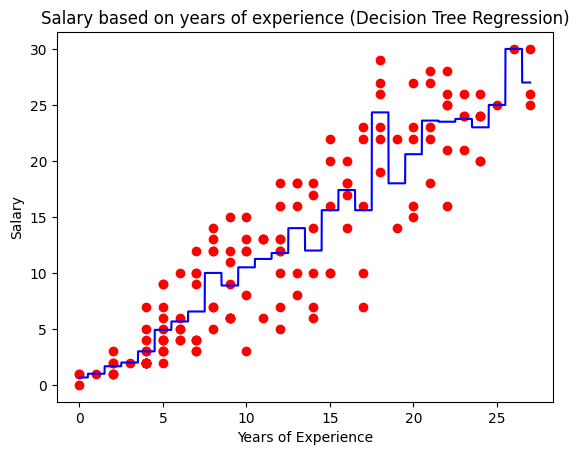

In [147]:
X_grid = np.arange(min(X), max(X), 0.01)

# reshape for reshaping the data into a len(X_grid)*1 array, i.e. to make 
#a column out of the X_grid values
X_grid = X_grid.reshape((len(X_grid), 1)) 
  
# scatter plot for original data
plt.scatter(X, y, color = 'red')
  
# plot predicted data
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue') 
  
# specify title
plt.title('Salary based on years of experience (Decision Tree Regression)') 
  
# specify X axis label
plt.xlabel('Years of Experience')
  
# specify Y axis label
plt.ylabel('Salary')
  
# show the plot
plt.show()


In [172]:
data=pd.read_csv("./Salary-RandomRegressor.csv")
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [179]:
x=data.iloc[:,1:2].values
y=data.iloc[:,-1].values
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [180]:
# Fitting Random Forest Regression to the dataset import the regressor
from sklearn.ensemble import RandomForestRegressor
 
# create regressor object
regressor = RandomForestRegressor(n_estimators=100)
 
# fit the regressor with x and y data
regressor.fit(x, y)

RandomForestRegressor()

In [181]:
Y_pred = regressor.predict(np.array([6]).reshape(1, 1))

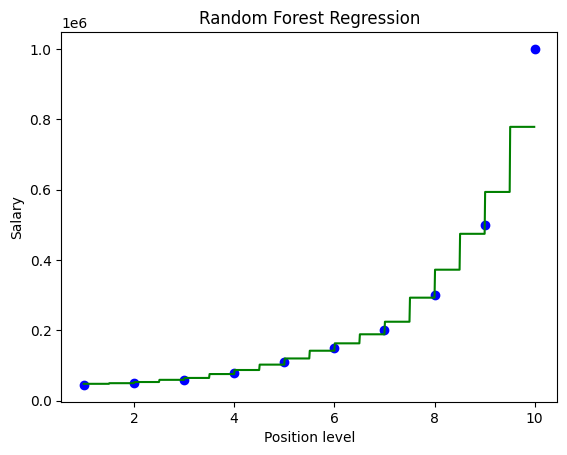

In [182]:

X_grid = np.arange(min(x), max(x), 0.01)
 
# reshape for reshaping the data into a len(X_grid)*1 array,i.e. to make a column out of the X_grid value
X_grid = X_grid.reshape((len(X_grid), 1))
 
# Scatter plot for original data
plt.scatter(x, y, color='blue')
 
# plot predicted data
plt.plot(X_grid, regressor.predict(X_grid),color='green')
plt.title('Random Forest Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()
